Load Database


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_excel('/content/sample_data/MFGEmployees.xlsx')

Data Exploration


In [ ]:
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,BusinessUnit,Age,LengthService,AbsentHours
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,Stores,32,6,36.577306
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,Stores,40,5,30.165072
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,Stores,48,4,83.807798
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,Stores,44,3,70.020165
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,Stores,35,3,0.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8287 non-null   int64  
 1   Surname         8287 non-null   object 
 2   GivenName       8287 non-null   object 
 3   Gender          8287 non-null   object 
 4   City            8287 non-null   object 
 5   JobTitle        8287 non-null   object 
 6   DepartmentName  8287 non-null   object 
 7   StoreLocation   8287 non-null   object 
 8   Division        8287 non-null   object 
 9   BusinessUnit    8287 non-null   object 
 10  Age             8287 non-null   int64  
 11  LengthService   8287 non-null   int64  
 12  AbsentHours     8287 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 841.8+ KB


In [ ]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8287.000000,8287.000000,8287.000000,8287.000000
mean,4171.160251,41.669844,4.244721,61.646342
std,2403.893129,9.731458,2.504105,48.955498
min,1.000000,16.000000,0.000000,0.000000
25%,2091.500000,35.000000,3.000000,20.003766
50%,4175.000000,42.000000,4.000000,56.381745
75%,6251.500000,48.000000,5.000000,94.540211
max,8336.000000,77.000000,43.000000,272.530123


In [ ]:
#create a mapping of unique values in a given field to integers and create new columns of mapped integers
def mapper(field, new_field):
    keys = field.unique()
    dicts = dict(zip(keys, range(len(keys))))
    print(dicts)
    df[new_field] = field.map(dicts).astype(int)

mapper(df.Gender, 'MappedGender')
mapper(df.City, 'MappedCity')
mapper(df.JobTitle, 'MappedTitle')
mapper(df.DepartmentName, 'MappedDept')
mapper(df.StoreLocation, 'MappedStoreLoc')
mapper(df.Division, 'MappedDivision')

{'F': 0, 'M': 1}
{'Burnaby': 0, 'Courtenay': 1, 'Richmond': 2, 'Victoria': 3, 'New Westminster': 4, 'Vancouver': 5, 'Sechelt': 6, 'North Vancouver': 7, 'Vananda': 8, 'West Vancouver': 9, 'Nanaimo': 10, 'Aldergrove': 11, 'Kelowna': 12, 'Trail': 13, 'Penticton': 14, 'Duncan': 15, 'Crawford Bay': 16, 'Port Hardy': 17, 'Abbotsford': 18, 'Dawson Creek': 19, 'Surrey': 20, 'Squamish': 21, 'Good Hope Lake': 22, 'Sidney': 23, 'Coquitlam': 24, 'Chilliwack': 25, 'Okanagan Mission': 26, 'Ganges': 27, 'Prince George': 28, 'Atlin': 29, 'Kamloops': 30, 'Whistler': 31, 'Spences Bridge': 32, 'New Westminister': 33, 'Gibsons': 34, 'Vernon': 35, 'Fauquier': 36, 'Mackenzie': 37, 'Gold Bridge': 38, 'Fort Fraser': 39, 'Nelson': 40, 'Kaslo': 41, 'Creston': 42, 'Wynndel': 43, 'Muncho Lake': 44, 'Kitimat': 45, 'Lac La Hache': 46, 'Armstrong': 47, 'Quesnel': 48, 'Hixon': 49, 'Ocean Falls': 50, 'Vallican': 51, 'North Pender Island': 52, 'Montney': 53, 'Burns Lake': 54, 'Midway': 55, 'Westwold': 56, 'Terrace': 57

Regression Analysis

In [ ]:
print(df.columns)

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit', 'Age',
       'LengthService', 'AbsentHours', 'MappedGender', 'MappedCity',
       'MappedTitle', 'MappedDept', 'MappedStoreLoc', 'MappedDivision'],
      dtype='object')


In [ ]:
num_feat = list(df.drop(columns=["Surname","GivenName","Gender","City","JobTitle","DepartmentName","StoreLocation","Division","BusinessUnit"]))
num_feat

['EmployeeNumber',
 'Age',
 'LengthService',
 'AbsentHours',
 'MappedGender',
 'MappedCity',
 'MappedTitle',
 'MappedDept',
 'MappedStoreLoc',
 'MappedDivision']

Test for Normal Distribution

In [ ]:
from scipy.stats import normaltest


In [ ]:
for i in num_feat:
  stats, pval=normaltest(df[i])
  if pval > 0.05:
    print(i,': Normal Distributed')
  else:
    print(i,': Not Normal Distributed')

EmployeeNumber : Not Normal Distributed
Age : Not Normal Distributed
LengthService : Not Normal Distributed
AbsentHours : Not Normal Distributed
MappedGender : Not Normal Distributed
MappedCity : Not Normal Distributed
MappedTitle : Not Normal Distributed
MappedDept : Not Normal Distributed
MappedStoreLoc : Not Normal Distributed
MappedDivision : Not Normal Distributed


Defining Y and X

In [ ]:
y = df["AbsentHours"]
y

0        36.577306
1        30.165072
2        83.807798
3        70.020165
4         0.000000
           ...    
8282     93.665111
8283      0.000000
8284    176.356940
8285     60.321917
8286    112.023389
Name: AbsentHours, Length: 8287, dtype: float64

In [ ]:
x = df.drop(columns=["EmployeeNumber","Surname","GivenName","Gender","City","JobTitle","DepartmentName","StoreLocation","Division","BusinessUnit","AbsentHours"])
x

,Age,LengthService,MappedGender,MappedCity,MappedTitle,MappedDept,MappedStoreLoc,MappedDivision
0,32,6,0,0,0,0,0,0
1,40,5,1,1,0,0,1,0
2,48,4,1,2,0,0,2,0
3,44,3,0,3,0,0,3,0
4,35,3,1,4,0,0,4,0
...,...,...,...,...,...,...,...,...
8282,46,4,0,63,7,6,29,0
8283,34,2,1,53,7,6,24,0
8284,58,4,0,9,7,6,6,0
8285,43,6,0,5,13,12,5,0


Standardize the Inputs

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

Training ML model for Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6629, 8) (1658, 8) (6629,) (1658,)


Showing the Regression Table

In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()

print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:            AbsentHours   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2266.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:07:41   Log-Likelihood:                -30846.
No. Observations:                6629   AIC:                         6.171e+04
Df Residuals:                    6620   BIC:                         6.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4014      0.312    196.770      0.0

To Dropx5(MappedTitle) As The P-Value Exceeded 0.05 and It is The Highest

In [ ]:
x = df.drop(columns=["EmployeeNumber","Surname","GivenName","Gender","City","JobTitle","DepartmentName","StoreLocation","Division","BusinessUnit","AbsentHours","MappedTitle"])
x

,Age,LengthService,MappedGender,MappedCity,MappedDept,MappedStoreLoc,MappedDivision
0,32,6,0,0,0,0,0
1,40,5,1,1,0,1,0
2,48,4,1,2,0,2,0
3,44,3,0,3,0,3,0
4,35,3,1,4,0,4,0
...,...,...,...,...,...,...,...
8282,46,4,0,63,6,29,0
8283,34,2,1,53,6,24,0
8284,58,4,0,9,6,6,0
8285,43,6,0,5,12,5,0


Rerun the ML Model for Linear Regression (Second Attempt)

In [ ]:
#standardize the x
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [ ]:
#set the training and test models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6629, 7) (1658, 7) (6629,) (1658,)


Show the New Regression Table

In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            AbsentHours   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2590.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:07:49   Log-Likelihood:                -30846.
No. Observations:                6629   AIC:                         6.171e+04
Df Residuals:                    6621   BIC:                         6.176e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4015      0.312    196.777      0.0

Drop x5 (MappedDept) As The P-Value Exceeded 0.05 and It is The Highest



In [ ]:
x = df.drop(columns=["EmployeeNumber","Surname","GivenName","Gender","City","JobTitle","DepartmentName","StoreLocation","Division","BusinessUnit","AbsentHours","MappedTitle","MappedDept"])
x

,Age,LengthService,MappedGender,MappedCity,MappedStoreLoc,MappedDivision
0,32,6,0,0,0,0
1,40,5,1,1,1,0
2,48,4,1,2,2,0
3,44,3,0,3,3,0
4,35,3,1,4,4,0
...,...,...,...,...,...,...
8282,46,4,0,63,29,0
8283,34,2,1,53,24,0
8284,58,4,0,9,6,0
8285,43,6,0,5,5,0


Rerun the ML Model for Linear Regression (Third Attempt)

In [ ]:
#standardize the x
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [ ]:
#set the training and test models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6629, 6) (1658, 6) (6629,) (1658,)


Show the New Regression Table

In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            AbsentHours   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3022.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:07:56   Log-Likelihood:                -30847.
No. Observations:                6629   AIC:                         6.171e+04
Df Residuals:                    6622   BIC:                         6.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4040      0.312    196.798      0.0

Drop x4 (MappedCity) As The P-Value Exceeded 0.05 and It is The Highest


In [ ]:
x = df.drop(columns=["EmployeeNumber","Surname","GivenName","Gender","City","JobTitle","DepartmentName","StoreLocation","Division","BusinessUnit","AbsentHours","MappedTitle","MappedDept","MappedCity"])
x

,Age,LengthService,MappedGender,MappedStoreLoc,MappedDivision
0,32,6,0,0,0
1,40,5,1,1,0
2,48,4,1,2,0
3,44,3,0,3,0
4,35,3,1,4,0
...,...,...,...,...,...
8282,46,4,0,29,0
8283,34,2,1,24,0
8284,58,4,0,6,0
8285,43,6,0,5,0


Rerun the ML Model for Linear Regression (Fourth Attempt)

In [ ]:
#standardize the x
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [ ]:
#set the training and test models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6629, 5) (1658, 5) (6629,) (1658,)


Show the New Regression Table

In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            AbsentHours   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3625.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:08:03   Log-Likelihood:                -30848.
No. Observations:                6629   AIC:                         6.171e+04
Df Residuals:                    6623   BIC:                         6.175e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4057      0.312    196.784      0.0

Drop x4 (MappedStoreLoc) As The P-Value Exceeded 0.05

In [ ]:
x = df.drop(columns=["EmployeeNumber","Surname","GivenName","Gender","City","JobTitle","DepartmentName","StoreLocation","Division","BusinessUnit","AbsentHours","MappedTitle","MappedDept","MappedCity","MappedStoreLoc"])
x

,Age,LengthService,MappedGender,MappedDivision
0,32,6,0,0
1,40,5,1,0
2,48,4,1,0
3,44,3,0,0
4,35,3,1,0
...,...,...,...,...
8282,46,4,0,0
8283,34,2,1,0
8284,58,4,0,0
8285,43,6,0,0


Rerun the ML Model for Linear Regression (Fifth Attempt)

In [ ]:
#standardize the x
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [ ]:
#set the training and test models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6629, 4) (1658, 4) (6629,) (1658,)


Show the New Regression Table

In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            AbsentHours   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     4529.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:08:12   Log-Likelihood:                -30849.
No. Observations:                6629   AIC:                         6.171e+04
Df Residuals:                    6624   BIC:                         6.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4069      0.312    196.763      0.0

Residual Plot

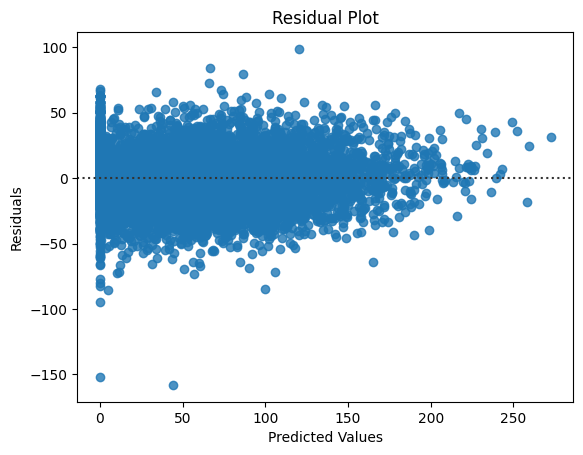

In [ ]:
import matplotlib.pyplot as plt

# Create the residual plot
sns.residplot(x=y_train, y=model_sm.resid)

# Add a title and labels to the plot
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


Test for Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

x_train_df = pd.DataFrame(x_train)
vif_df["features"] = x_train_df.columns
vif_df["VIF Factor"] = [vif(x_train, i) for i in range(x_train.shape[1])]


print(vif_df)


   features  VIF Factor
0         0    1.012371
1         1    1.412928
2         2    1.003591
3         3    1.405238


Displaying the Linear Regression Equation of the Model

In [ ]:
print("Linear Regression Equation:")
print("AbsentHours = {:.3f} + {:.3f} * Age + {:.3f} * LengthService + {:.3f} * MappedGender + {:.3f} * MappedDivision".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))


Linear Regression Equation:
AbsentHours = 61.407 + 41.726 * Age + -3.584 * LengthService + -8.238 * MappedGender + -2.211 * MappedDivision
